QUESTION 1

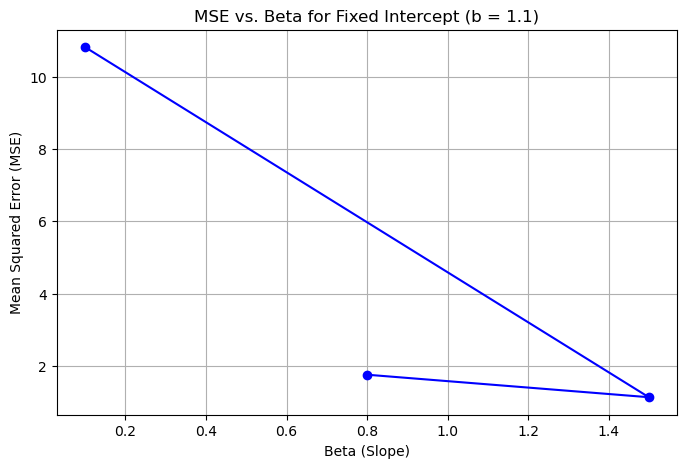

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Experience': [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4],
    'Salary': [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2]
}

df = pd.DataFrame(data)

csv_filename = 'salary_experience.csv'
df.to_csv(csv_filename, index=False)

experience = df['Experience'].values
salary = df['Salary'].values

b = 1.1

beta_values = [0.1, 1.5, 0.8]

mse_values = []
for beta in beta_values:
    predicted_salary = beta * experience + b
    mse = np.mean((salary - predicted_salary) ** 2)
    mse_values.append(mse)

plt.figure(figsize=(8, 5))
plt.plot(beta_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta for Fixed Intercept (b = 1.1)')
plt.grid(True)
plt.show()

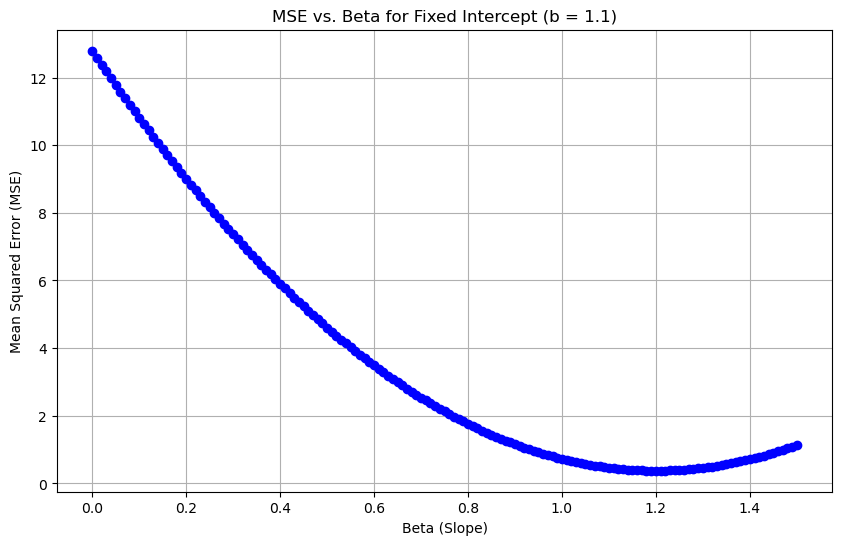

In [15]:
b = 1.1


beta_values = np.arange(0, 1.51, 0.01)

mse_values = []
for beta in beta_values:
    predicted_salary = beta * experience + b
    mse = np.mean((salary - predicted_salary) ** 2)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(beta_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta for Fixed Intercept (b = 1.1)')
plt.grid(True)
plt.show()


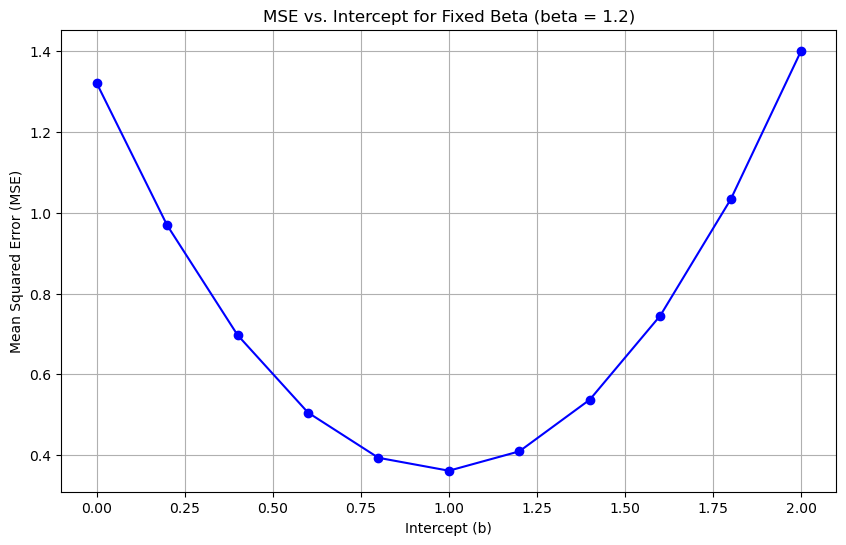

In [16]:
beta = 1.2
intercept_values = np.arange(0, 2.1, 0.2)
mse_values = []
for b in intercept_values:
    predicted_salary = beta * experience + b
    mse = np.mean((salary - predicted_salary) ** 2)
    mse_values.append(mse)
plt.figure(figsize=(10, 6))
plt.plot(intercept_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Intercept (b)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Intercept for Fixed Beta (beta = 1.2)')
plt.grid(True)
plt.show()

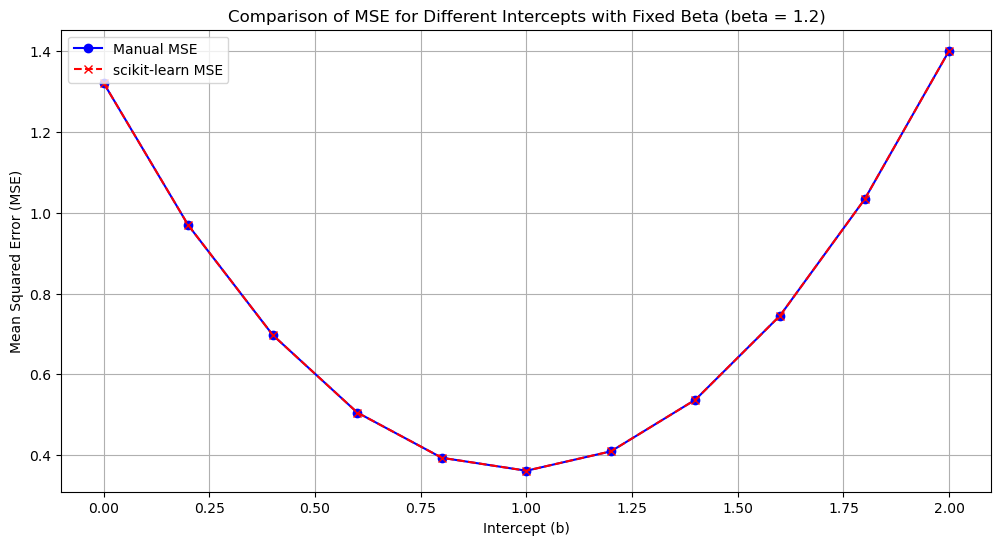

In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
beta = 1.2

intercept_values = np.arange(0, 2.1, 0.2)

mse_values_manual = []
mse_values_sklearn = []
experience = df['Experience'].values.reshape(-1, 1)
salary = df['Salary'].values

for b in intercept_values:
    #manual
    predicted_salary_manual = beta * experience.flatten() + b
    mse_manual = np.mean((salary - predicted_salary_manual) ** 2)
    mse_values_manual.append(mse_manual)
    
    # Use scikit-learn 
    model = LinearRegression(fit_intercept=False)  
    model.coef_ = np.array([beta])
    model.intercept_ = b
    predicted_salary_sklearn = model.predict(experience)
    mse_sklearn = mean_squared_error(salary, predicted_salary_sklearn)
    mse_values_sklearn.append(mse_sklearn)


plt.figure(figsize=(12, 6))
plt.plot(intercept_values, mse_values_manual, marker='o', linestyle='-', color='b', label='Manual MSE')
plt.plot(intercept_values, mse_values_sklearn, marker='x', linestyle='--', color='r', label='scikit-learn MSE')
plt.xlabel('Intercept (b)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Different Intercepts with Fixed Beta (beta = 1.2)')
plt.legend()
plt.grid(True)
plt.show()


QUESTION 2

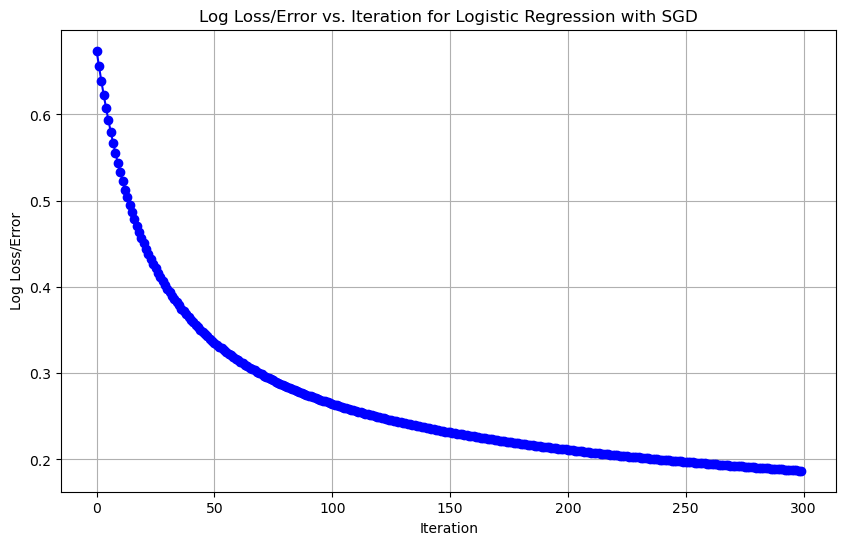

Final intercept (B0): [0.87965285]
Final coefficient (B1): 3.2622779892631444


In [25]:
df = pd.DataFrame(data)

threshold = 4.0  
df['Target'] = (df['Salary'] > threshold).astype(int)

X = df[['Experience']].values
y = df['Target'].values


X_mean = np.mean(X)
X_std = np.std(X)
X_scaled = (X - X_mean) / X_std

n_samples, n_features = X_scaled.shape
beta = np.zeros(n_features) 
intercept = 0 
learning_rate = 0.01
epochs = 5
iterations = 60


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_log_loss(y_true, y_pred_proba):
    epsilon = 1e-15
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba))


log_losses = []


for epoch in range(epochs):
    for i in range(iterations):
        for j in range(n_samples):
            xi = X_scaled[j].reshape(1, -1)
            yi = y[j]
            
            linear_model = np.dot(xi, beta) + intercept
            y_pred_proba = sigmoid(linear_model)
            
            error = y_pred_proba - yi
            beta_grad = xi * error
            intercept_grad = error
            
            beta -= learning_rate * beta_grad.flatten()
            intercept -= learning_rate * intercept_grad
            
        y_pred_proba_full = sigmoid(np.dot(X_scaled, beta) + intercept)
        log_loss_value = compute_log_loss(y, y_pred_proba_full)
        log_losses.append(log_loss_value)

plt.figure(figsize=(10, 6))
plt.plot(range(len(log_losses)), log_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs. Iteration for Logistic Regression with SGD')
plt.grid(True)
plt.show()
print(f"Final intercept (B0): {intercept}")
print(f"Final coefficient (B1): {beta[0]}")

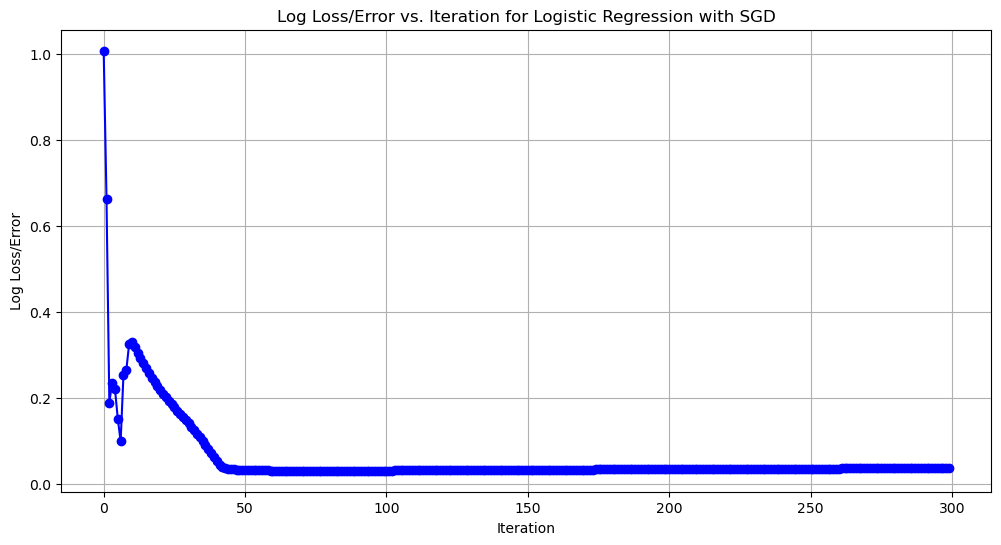

Final intercept (B0): 8.737862999865362
Final coefficient (B1): 27.723548891001283


In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42)
epochs = 5
iterations_per_epoch = 60
total_iterations = epochs * iterations_per_epoch
log_losses = []
intercepts = []
coefficients = []
for epoch in range(epochs):
    for i in range(iterations_per_epoch):

        sgd_clf.partial_fit(X_scaled, y, classes=np.unique(y))
        
        intercepts.append(sgd_clf.intercept_[0])
        coefficients.append(sgd_clf.coef_[0, 0])
        
        y_pred_proba = sgd_clf.predict_proba(X_scaled)
        loss = log_loss(y, y_pred_proba)
        log_losses.append(loss)
plt.figure(figsize=(12, 6))
plt.plot(range(total_iterations), log_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs. Iteration for Logistic Regression with SGD')
plt.grid(True)
plt.show()
print(f"Final intercept (B0): {sgd_clf.intercept_[0]}")
print(f"Final coefficient (B1): {sgd_clf.coef_[0, 0]}")



code for the graph

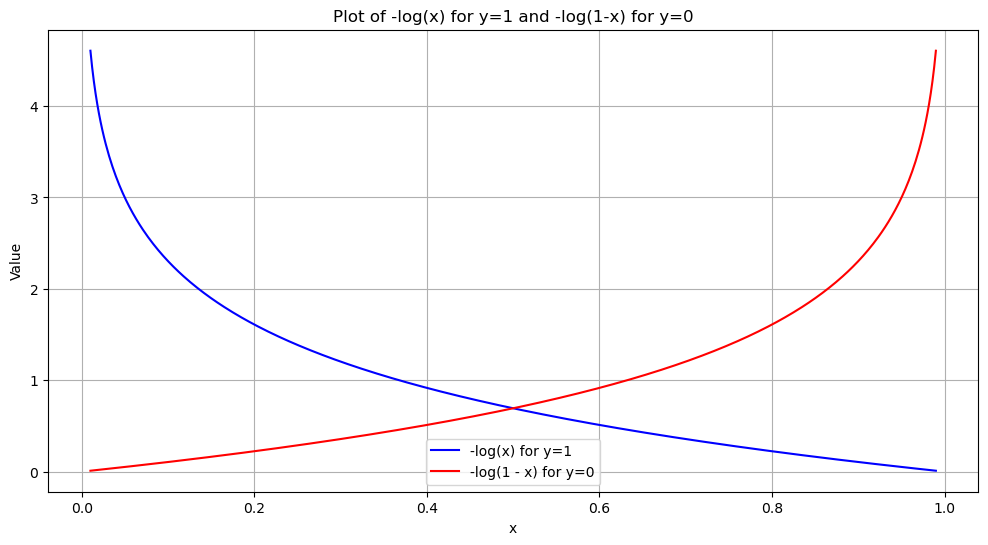

In [27]:
x = np.linspace(0.01, 0.99, 500) 
y1 = -np.log(x)
y0 = -np.log(1 - x)
plt.figure(figsize=(12, 6))
plt.plot(x, y1, label='-log(x) for y=1', color='blue')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Plot of -log(x) for y=1 and -log(1-x) for y=0')
plt.grid(True)
plt.plot(x, y0, label='-log(1 - x) for y=0', color='red')
plt.legend()
plt.show()


QUESTION 3

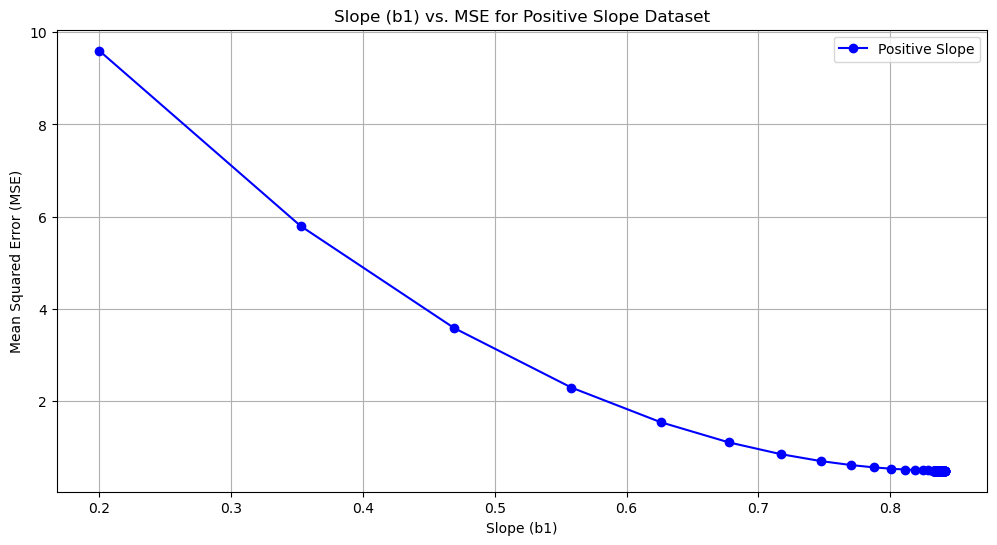

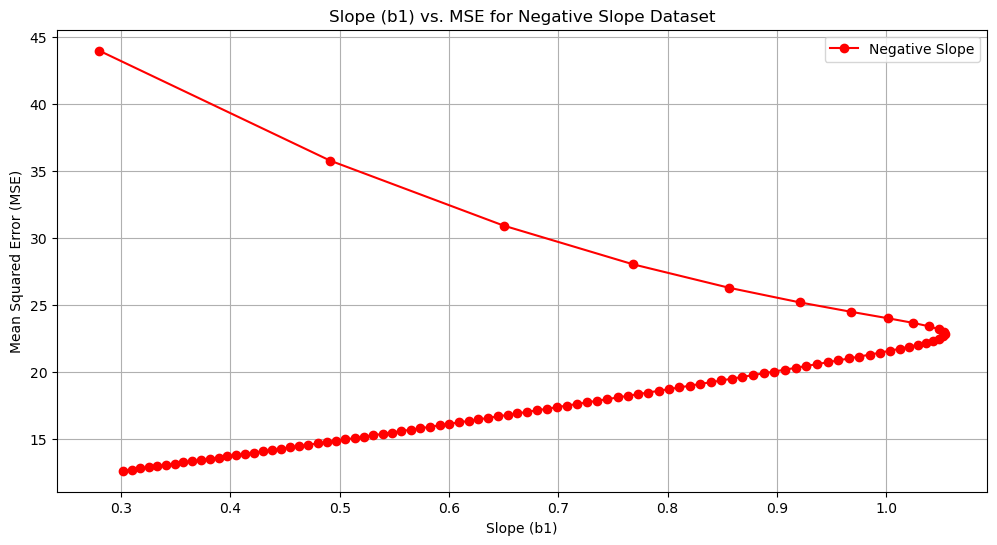

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, learning_rate=0.01, epochs=100):
    n_samples = len(y)
    b1 = 0  
    b0 = 0 
    b1_values = []  
    mse_values = [] 
    
    for epoch in range(epochs):
        y_pred = b1 * x + b0
        error = y_pred - y
        mse = (1/n_samples) * np.sum(error**2)
        
        b1_grad = (2/n_samples) * np.sum(error * x)
        b0_grad = (2/n_samples) * np.sum(error)
        
        b1 -= learning_rate * b1_grad
        b0 -= learning_rate * b0_grad
        
        b1_values.append(b1)
        mse_values.append(mse)
    
    return b1_values, mse_values

x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5]) 
x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])  
b1_values_pos, mse_values_pos = gradient_descent(x_pos, y_pos)
b1_values_neg, mse_values_neg = gradient_descent(x_neg, y_neg)

plt.figure(figsize=(12, 6))
plt.plot(b1_values_pos, mse_values_pos, marker='o', linestyle='-', color='blue', label='Positive Slope')
plt.xlabel('Slope (b1)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Slope (b1) vs. MSE for Positive Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(b1_values_neg, mse_values_neg, marker='o', linestyle='-', color='red', label='Negative Slope')
plt.xlabel('Slope (b1)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Slope (b1) vs. MSE for Negative Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()


QUESTION 4

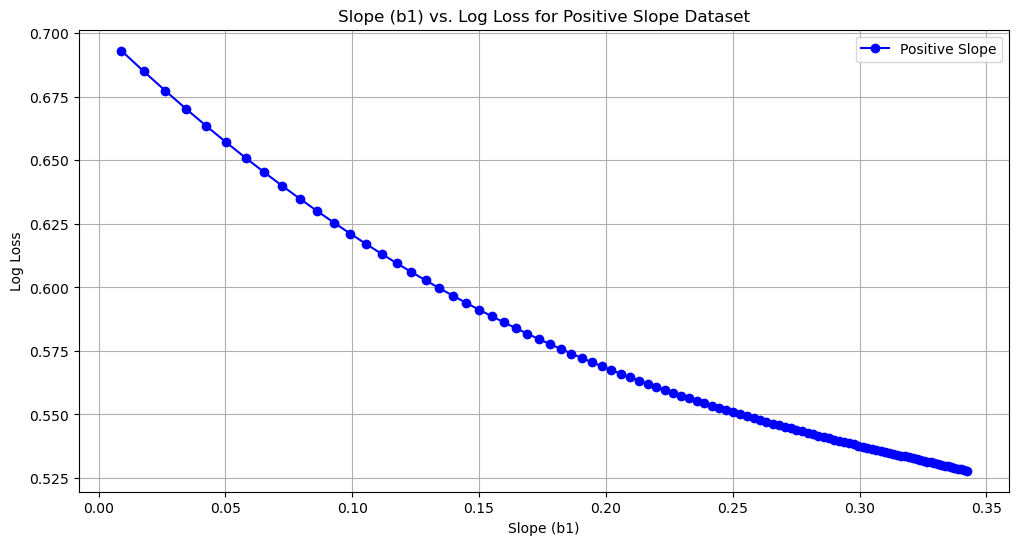

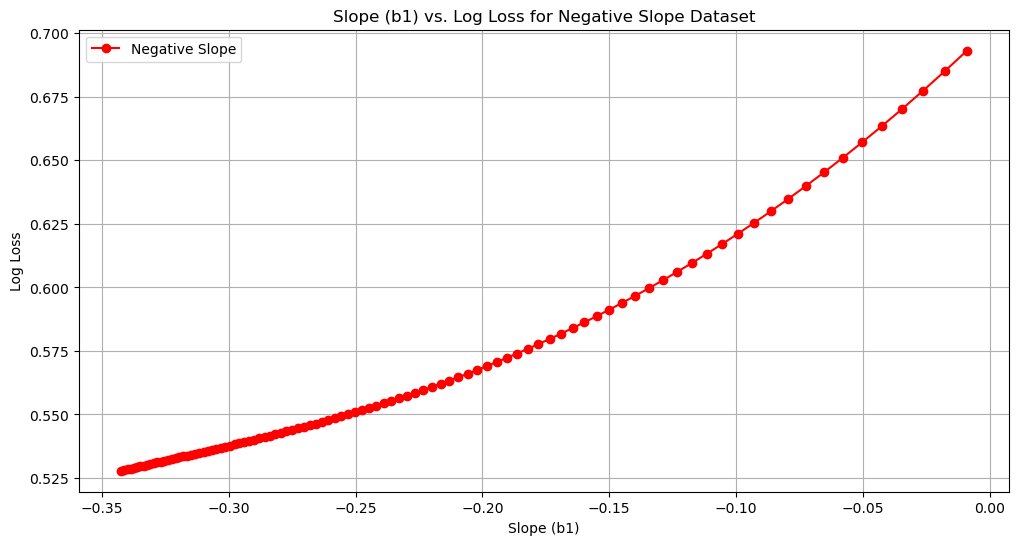

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def compute_log_loss(y_true, y_pred_proba):
    epsilon = 1e-15
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba))
def logistic_regression_gradient_descent(x, y, learning_rate=0.01, epochs=100):
    n_samples = len(y)
    b1 = 0  
    b0 = 0  
    b1_values = [] 
    log_loss_values = []  
    
    for epoch in range(epochs):
        y_pred_proba = sigmoid(b1 * x + b0)
        log_loss_value = compute_log_loss(y, y_pred_proba)
        error = y_pred_proba - y
        b1_grad = (1/n_samples) * np.sum(error * x)
        b0_grad = (1/n_samples) * np.sum(error)
        b1 -= learning_rate * b1_grad
        b0 -= learning_rate * b0_grad
        b1_values.append(b1)
        log_loss_values.append(log_loss_value)
    
    return b1_values, log_loss_values


x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])  

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])  

b1_values_pos, log_loss_values_pos = logistic_regression_gradient_descent(x_pos, y_pos)
b1_values_neg, log_loss_values_neg = logistic_regression_gradient_descent(x_neg, y_neg)

plt.figure(figsize=(12, 6))
plt.plot(b1_values_pos, log_loss_values_pos, marker='o', linestyle='-', color='blue', label='Positive Slope')
plt.xlabel('Slope (b1)')
plt.ylabel('Log Loss')
plt.title('Slope (b1) vs. Log Loss for Positive Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(b1_values_neg, log_loss_values_neg, marker='o', linestyle='-', color='red', label='Negative Slope')
plt.xlabel('Slope (b1)')
plt.ylabel('Log Loss')
plt.title('Slope (b1) vs. Log Loss for Negative Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()
